In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
f0 = 2400 #Гц
Vmod = 600 #Бод
Vinf = 2400 #бит/с

T = 1 / Vmod
m = math.ceil(Vinf / Vmod)
q = 2 ** m 

A = 1 
N = 12 
dt = (1/f0)/N
W = 2 / T #ширина полосы частот
f = np.arange(0, 4*W, 1)
n = 16
Wi = 2 / (n*T) #Ширина полосы частот для последовательности сигналов
fi = np.arange(0, Wi, 1)

In [3]:
def getSi12(i): #Получение коэффициентов по номеру сигнала
    i1 = i // np.sqrt(q)
    i2 = i % np.sqrt(q)
    si1 = A*(1 - ((2*i1)/(np.sqrt(q)-1)))
    si2 = A*(1 - ((2*i2)/(np.sqrt(q)-1)))
    return si1, si2
    
#Преобразование Фурье - спектр последовательности сигналов
S = lambda si, f, l:(si[0] * np.sqrt(T / 2) * \
                    (np.sinc((f - f0) * T) + \
                    np.sinc((f + f0) * T)) * \
                    np.exp(-1j * np.pi * f * T) + \
                    (si[1] / 1j) * np.sqrt(T / 2) * \
                    (np.sinc((f - f0) * T) - \
                    np.sinc((f + f0) * T)) * \
                    np.exp(-1j * np.pi * f * T)) * \
                    np.exp(-2j * np.pi * f * l * T) 

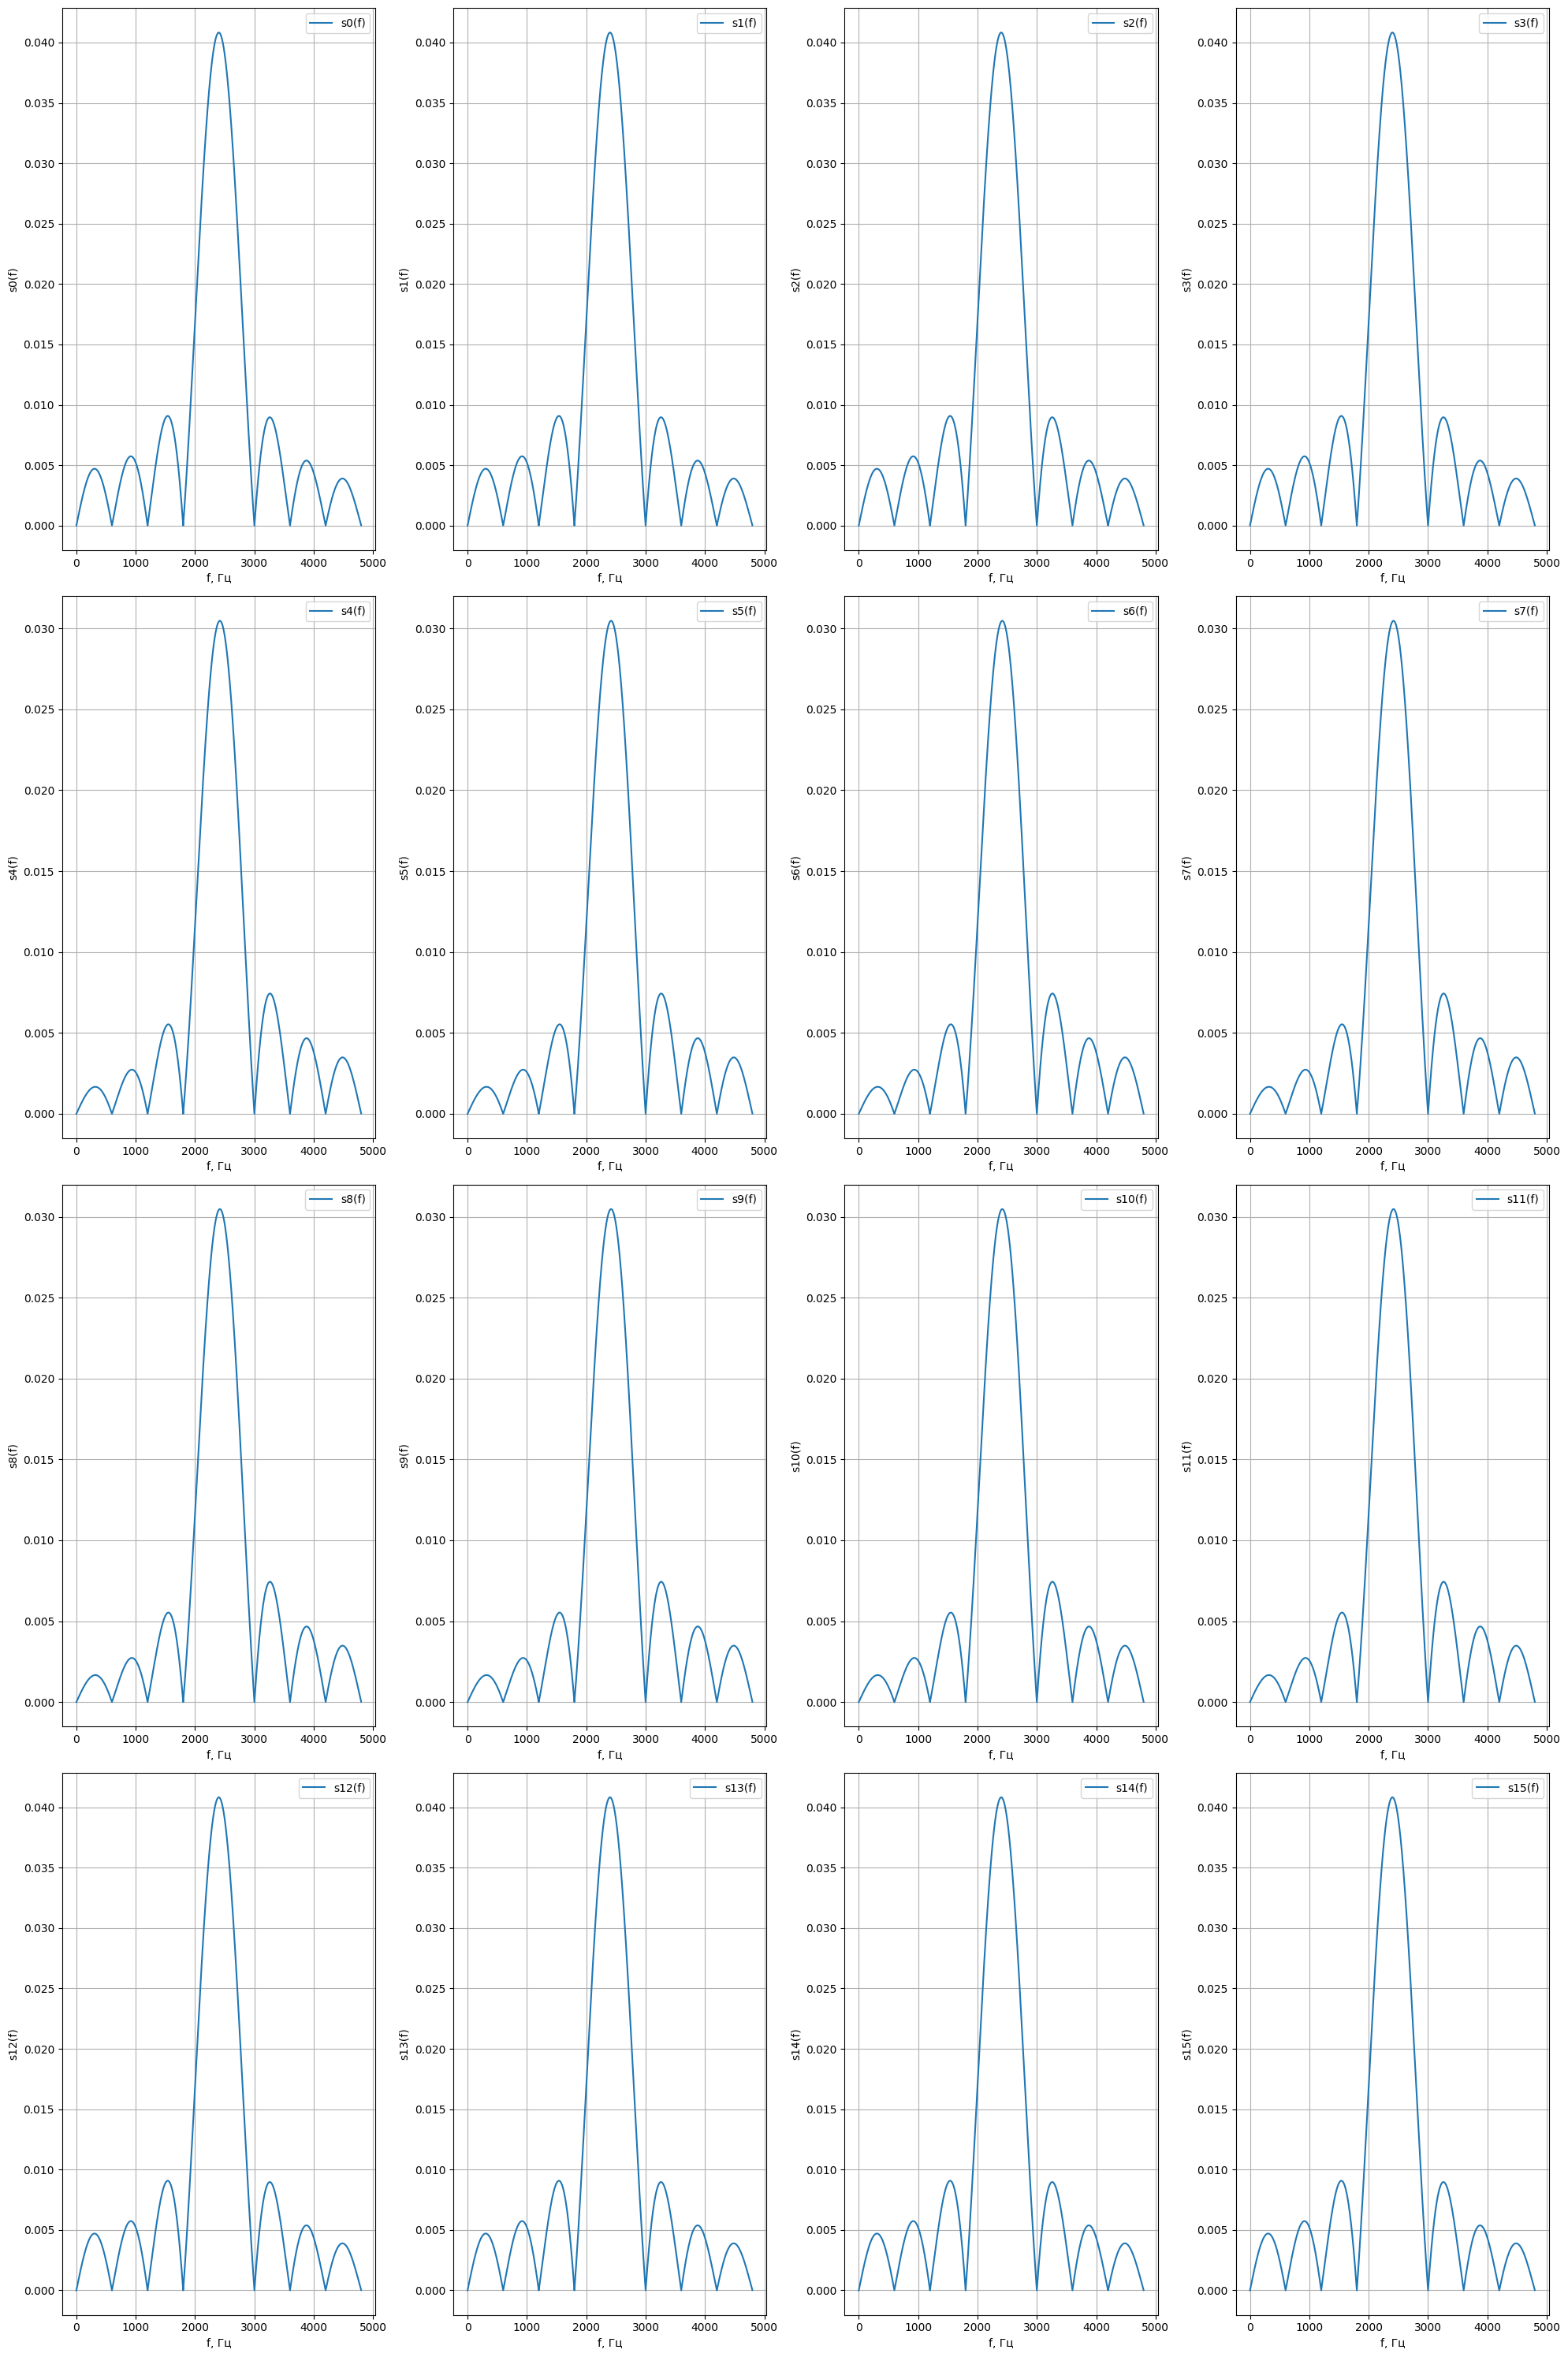

In [4]:
fig, axs = plt.subplots(4, 4, figsize=(20,30))

k = 0

for i in range(4):
    for j in range (4):
        axs[i, j].plot(f, abs(S(getSi12(i), f, 1)), label='s{}(f)'.format(k))
        axs[i, j].set_xlabel('f, Гц')
        axs[i, j].set_ylabel('s{}(f)'.format(k))
        axs[i, j].legend()
        axs[i, j].grid()
        k += 1
    
fig.tight_layout()

In [11]:
#Si = np.random.randint(q, size=2)
Si = [1,5]
#Si = [0,0]
print(Si)

[1, 5]


In [12]:
#Вывод выражения 2.10(спектр последовательности сигналов)
Ssum = 0
S_perv = 0
for l, si in enumerate(Si):
    Ssum += S(getSi12(si), f, l) #суммирование сигналов одной последовательности
    S_perv += S(getSi12(0), f, 1) #S(getSi12(i), f, 1)

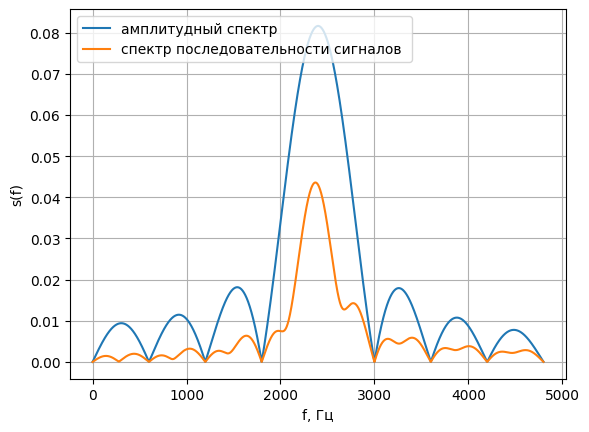

In [13]:
plt.plot(f, np.abs(S_perv),label='амплитудный спектр')
plt.plot(f, np.abs(Ssum), label='спектр последовательности сигналов ')
plt.xlabel('f, Гц')
plt.ylabel('s(f)')
plt.legend(loc = 'upper left')
plt.grid()
plt.show()

In [14]:
Si = np.random.randint(q, size=3)
#Si = [0,15]
print(Si)

[ 1  0 10]


In [15]:
#Вывод выражения 2.10(спектр последовательности сигналов)
Ssum = 0
S_perv = 0
for l, si in enumerate(Si):
    Ssum += S(getSi12(si), f, l) #суммирование сигналов одной последовательности
    S_perv += S(getSi12(0), f, 1)

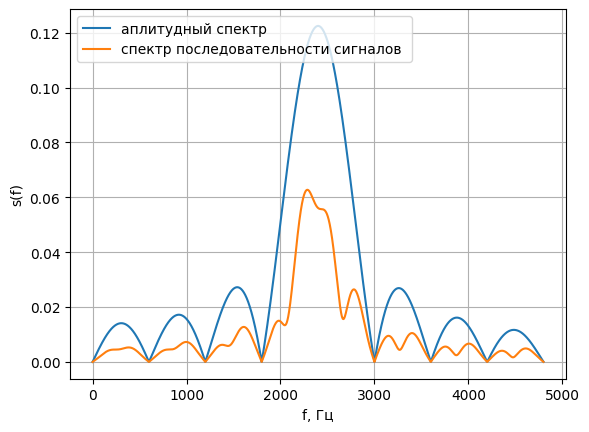

In [16]:
plt.plot(f, np.abs(S_perv), label='аплитудный спектр')
plt.plot(f, np.abs(Ssum), label='спектр последовательности сигналов ')
plt.xlabel('f, Гц')
plt.ylabel('s(f)')
plt.legend(loc = 'upper left')
plt.grid()
plt.show()